In [1]:
from line_solver import *
from scipy import optimize
import numpy as np

In [2]:
model = Network('LoadBalCQN')
# Block 1: nodes
delay = Delay(model, 'Think')
queue1 = Queue(model, 'Queue1', SchedStrategy.PS)
queue2 = Queue(model, 'Queue2', SchedStrategy.PS)
# Block 2: classes
cclass = ClosedClass(model, 'Job1', 16, delay)
delay.set_service(cclass, Exp(1))
queue1.set_service(cclass, Exp(0.75))
queue2.set_service(cclass, Exp(0.50))
P = model.init_routing_matrix()
P.set(cclass, cclass, queue1, delay, 1.0)
P.set(cclass, cclass, queue2, delay, 1.0)
model.link(P)

def objFun(p):
    P.set(cclass, cclass, delay, queue1, p)
    P.set(cclass, cclass, delay, queue2, 1.0 - p)
    model.relink(P)
    # Block 4: solution
    R = SolverMVA(model, method='exact', verbose=False).avg_sys_resp_t()    
    return R[0]

In [3]:
p_opt = optimize.fminbound(objFun, 0, 1)
print(p_opt[0])

[[19.77711309]]
[[13.65298573]]
[[16.29734017]]
[[13.63923075]]
[[13.65182599]]
[[13.63823752]]
[[13.63823663]]
[[13.63823658]]
[[13.63823658]]
[[13.63823658]]
0.6104878504366782


[[31.68]]
[[31.36]]
[[31.04]]
[[30.72]]
[[30.4]]
[[30.08]]
[[29.76]]
[[29.44]]
[[29.12]]
[[28.8]]
[[28.48]]
[[28.16]]
[[27.84]]
[[27.52]]
[[27.2]]
[[26.88]]
[[26.56]]
[[26.24]]
[[25.92]]
[[25.6]]
[[25.28]]
[[24.96]]
[[24.64]]
[[24.32]]
[[24.00000001]]
[[23.68000001]]
[[23.36000003]]
[[23.04000005]]
[[22.7200001]]
[[22.40000019]]
[[22.08000035]]
[[21.76000066]]
[[21.44000121]]
[[21.12000221]]
[[20.800004]]
[[20.4800072]]
[[20.16001284]]
[[19.84002276]]
[[19.52004006]]
[[19.20007007]]
[[18.88012179]]
[[18.56021042]]
[[18.24036144]]
[[17.92061721]]
[[17.60104784]]
[[17.28176831]]
[[16.96296572]]
[[16.64494146]]
[[16.32817538]]
[[16.01342077]]
[[15.70183981]]
[[15.39518726]]
[[15.09604125]]
[[14.80806069]]
[[14.53621263]]
[[14.2868645]]
[[14.06759136]]
[[13.88655085]]
[[13.75138127]]
[[13.66779661]]
[[13.6382996]]
[[13.66152403]]
[[13.73251287]]
[[13.84382306]]
[[13.98699937]]
[[14.15389873]]
[[14.33754814]]
[[14.53248988]]
[[14.73474521]]
[[14.9415749]]
[[15.15117942]]
[[15.36242186]]
[[1

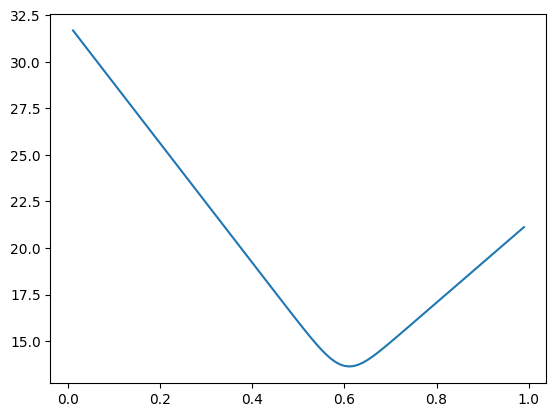

In [4]:
import matplotlib.pyplot as plt
y = []
x = np.arange(0.01,1,0.01)
y = np.array(list(map(lambda x:objFun(x), x)))
plt.plot(x, y)